In [7]:
library(tidyverse)
library(tidymodels)
library(readxl)

**<u><h4>Introduction</u></h4>**

Students performance in an exam can be one of the determination of their level of knowledge. If a student had a high performance in an exam, then they will be considered to have high knowledge of the topic. However, we are not sure if preparation or knowledge in a related topic will help a student with their knowledge.

So, through the data set of the user knowledge, which is about students knowledge on electrical DC machines. In this data set, it contains:
1. Degree of study time for goal object materials (STG),
2. Degree of repetition number of user for goal object materials (SCG),
3. Degree of study time of user for related objects with goal object (STR).
4. Exam performance of user for related objects with goal object (LPR).
5. Exam performance of user for goal objects (PEG).

With the last column being the knowledge level of the user (UNS). The knowledge level of the user is separated into:
- High
- Middle
- Low
- very_low

Through this data set, we hope to answer our question: Given observation with known STC, SCG, STR, LPR, and PEG, what is its category of UNS?





In [8]:
#Import data
download.file("https://archive.ics.uci.edu/static/public/257/user+knowledge+modeling.zip",
                   destfile="Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.zip")
#Extract data from a zip file
unzip("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.zip", 
      exdir = "data")
#wrangle data
data_train<-read_excel("data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls",sheet=2)|>
    select(STG:UNS)|>
    mutate(UNS=as_factor(UNS))
data_test<-read_excel("data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls",sheet=3)|>
    select(STG:UNS)|>
    mutate(UNS=as_factor(UNS))
head(data_train)
head(data_test)

New names:
• `` -> `...7`
• `` -> `...8`
New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low


In [9]:
# Summarize training data grouped by difference UNS for each quantitative variable in 5 tables
data_train|>group_by(UNS)|>
    summarize("Mean of STG"=mean(STG),
             "Standard deviation of STG"=sd(STG),
             "Max of STG"=max(STG),
             "Min of STG"=min(STG))

data_train|>group_by(UNS)|>
    summarize("Mean of SCG"=mean(SCG),
             "Standard deviation of SCG"=sd(SCG),
             "Max of SCG"=max(SCG),
             "Min of SCG"=min(SCG))

data_train|>group_by(UNS)|>
    summarize("Mean of STR"=mean(STR),
             "Standard deviation of STR"=sd(STR),
             "Max of STR"=max(STR),
             "Min of STR"=min(STR))

data_train|>group_by(UNS)|>
    summarize("Mean of LPR"=mean(LPR),
             "Standard deviation of LPR"=sd(LPR),
             "Max of LPR"=max(LPR),
             "Min of LPR"=min(LPR))

data_train|>group_by(UNS)|>
    summarize("Mean of PEG"=mean(PEG),
             "Standard deviation of PEG"=sd(PEG),
             "Max of PEG"=max(PEG),
             "Min of PEG"=min(PEG))
# Summarize the number of observations of each category of UNS
data_train|>group_by(UNS)|>
    summarize("Number of users"=n())

UNS,Mean of STG,Standard deviation of STG,Max of STG,Min of STG
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
very_low,0.3057917,0.1872919,0.68,0.00
High,0.4216508,0.2396612,0.99,0.00
Low,0.3211446,0.1739915,0.73,0.02
Middle,0.3999773,0.2135850,0.80,0.06


UNS,Mean of SCG,Standard deviation of SCG,Max of SCG,Min of SCG
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
very_low,0.1981250,0.1363245,0.60,0.000
High,0.4231905,0.2340361,0.90,0.000
Low,0.3370000,0.1927264,0.85,0.010
Middle,0.3679205,0.2076783,0.85,0.015


UNS,Mean of STR,Standard deviation of STR,Max of STR,Min of STR
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
very_low,0.3662500,0.2184891,0.71,0.00
High,0.5016667,0.2587361,0.95,0.02
Low,0.4307229,0.2515308,0.88,0.02
Middle,0.5068182,0.2284558,0.89,0.02


UNS,Mean of LPR,Standard deviation of LPR,Max of LPR,Min of LPR
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
very_low,0.3587500,0.1970282,0.66,0.00
High,0.5012698,0.2772881,0.99,0.01
Low,0.4973494,0.2251400,0.98,0.04
Middle,0.3428409,0.2279088,0.88,0.02


UNS,Mean of PEG,Standard deviation of PEG,Max of PEG,Min of PEG
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
very_low,0.09083333,0.05633106,0.24,0.00
High,0.77253968,0.10756796,0.93,0.47
Low,0.23762651,0.07299193,0.35,0.01
Middle,0.54238636,0.12621815,0.83,0.25


UNS,Number of users
<fct>,<int>
very_low,24
High,63
Low,83
Middle,88


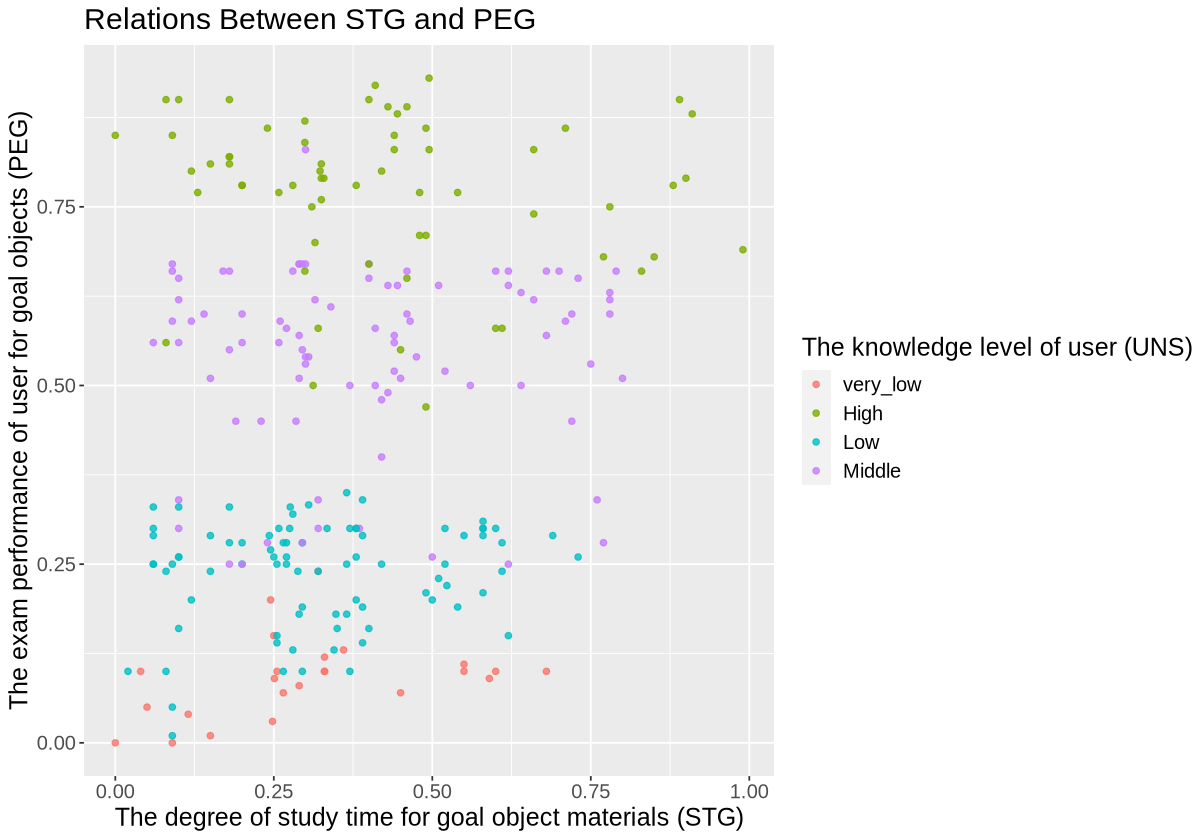

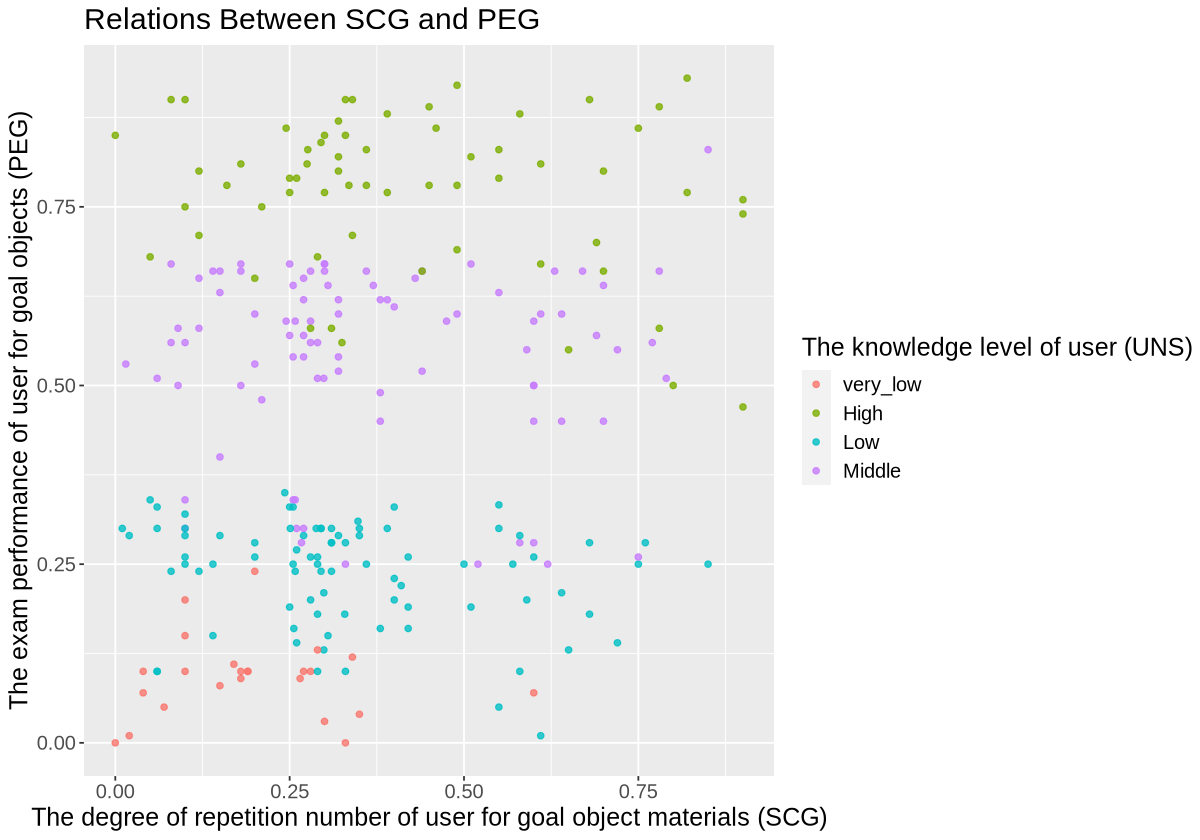

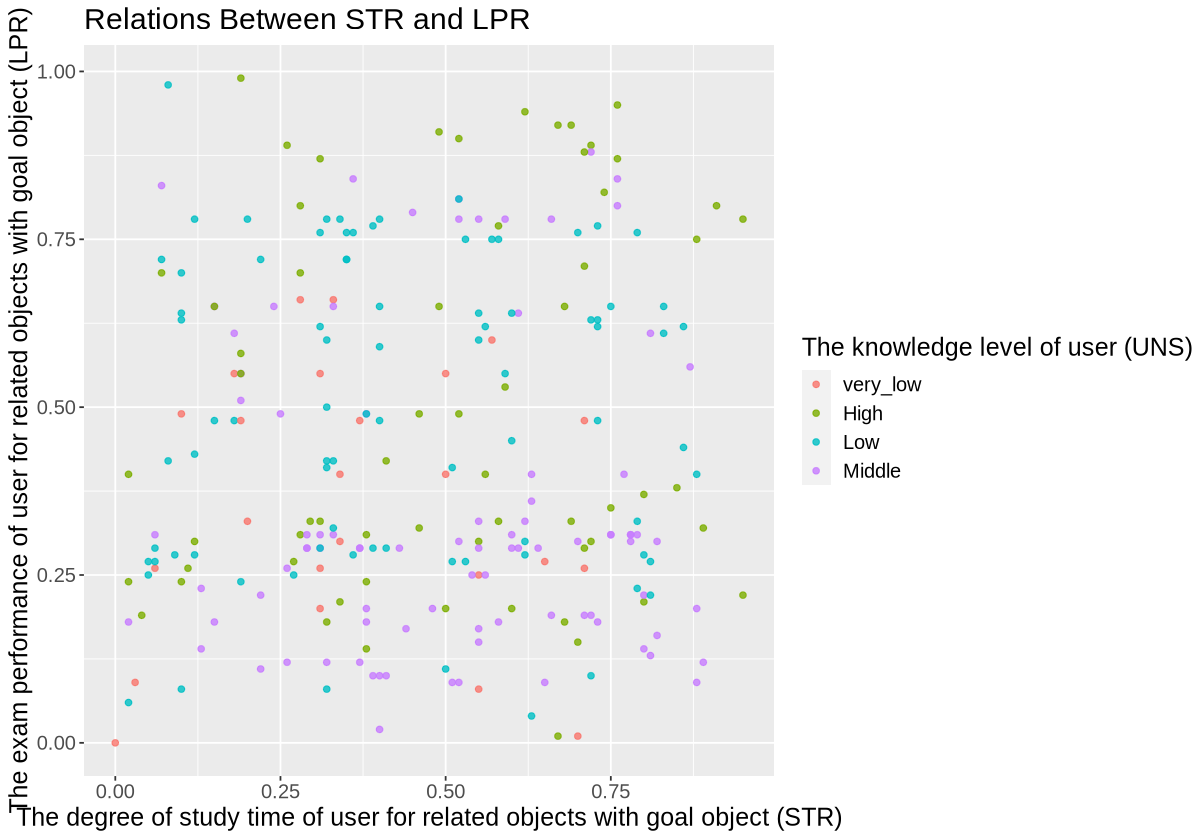

In [10]:
# Find relations between STG and PEG, between SCG and PEG, and between STR and LPR using 3 scatterplots in the training dataset.
# Use color=UNS to differentiate the UNS of each observation.
options(repr.plot.width=10,repr.plot.height=7)
plot_STG_PEG<-data_train|>ggplot(aes(x=STG,y=PEG,color=UNS))+
    geom_point(alpha=0.8)+
    ggtitle("Relations Between STG and PEG")+
    labs(x="The degree of study time for goal object materials (STG)",
        y="The exam performance of user for goal objects (PEG)",
        color="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STG_PEG

plot_SCG_PEG<-data_train|>ggplot(aes(x=SCG,y=PEG,color=UNS))+
    geom_point(alpha=0.8)+
    ggtitle("Relations Between SCG and PEG")+
    labs(x="The degree of repetition number of user for goal object materials (SCG)",
        y="The exam performance of user for goal objects (PEG)",
        color="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_SCG_PEG

plot_STR_LPR<-data_train|>ggplot(aes(x=STR,y=LPR,color=UNS))+
    geom_point(alpha=0.8)+
    ggtitle("Relations Between STR and LPR")+
    labs(x="The degree of study time of user for related objects with goal object (STR)",
        y="The exam performance of user for related objects with goal object (LPR)",
        color="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STR_LPR

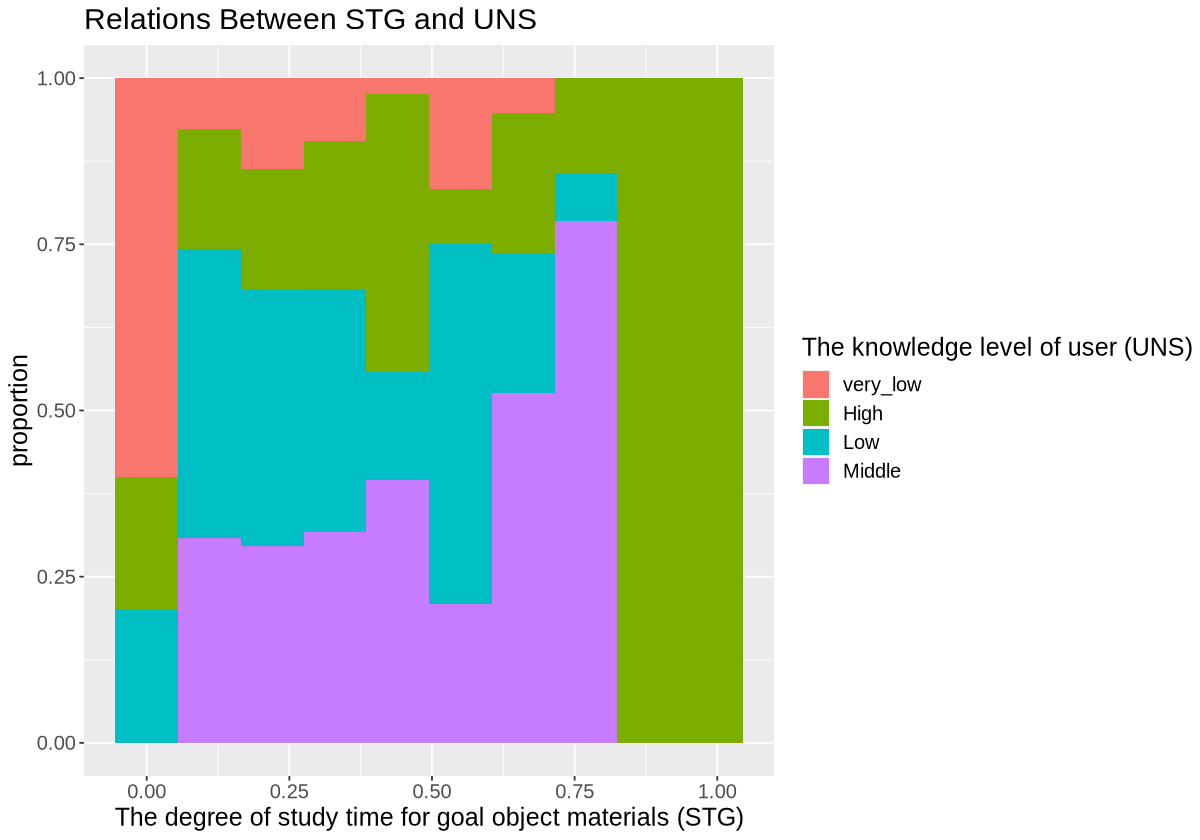

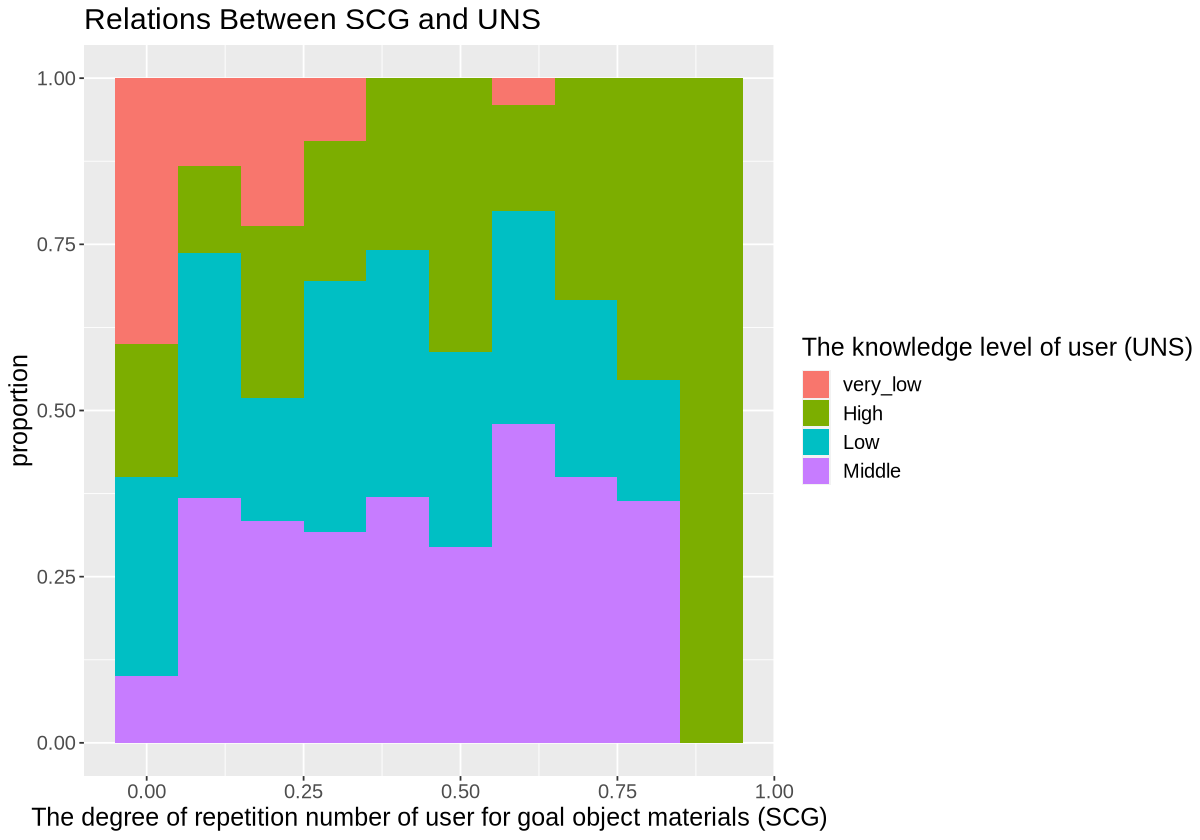

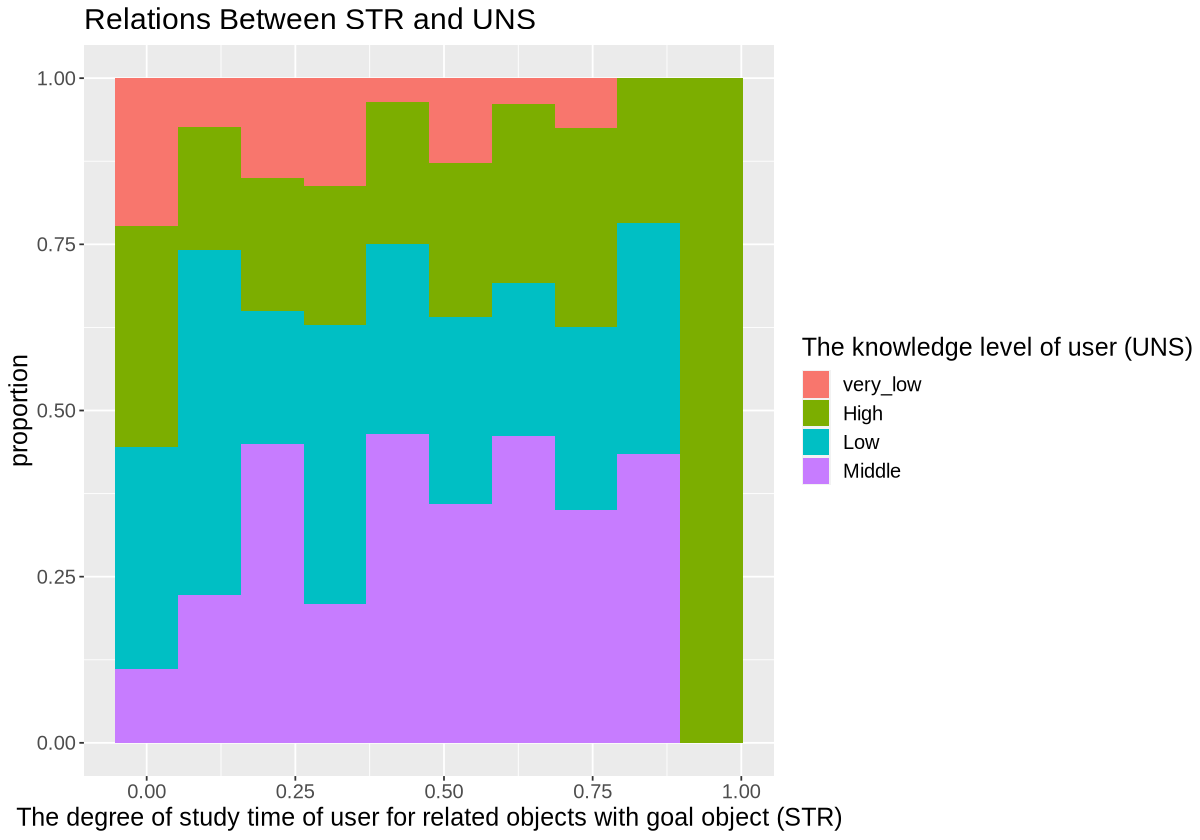

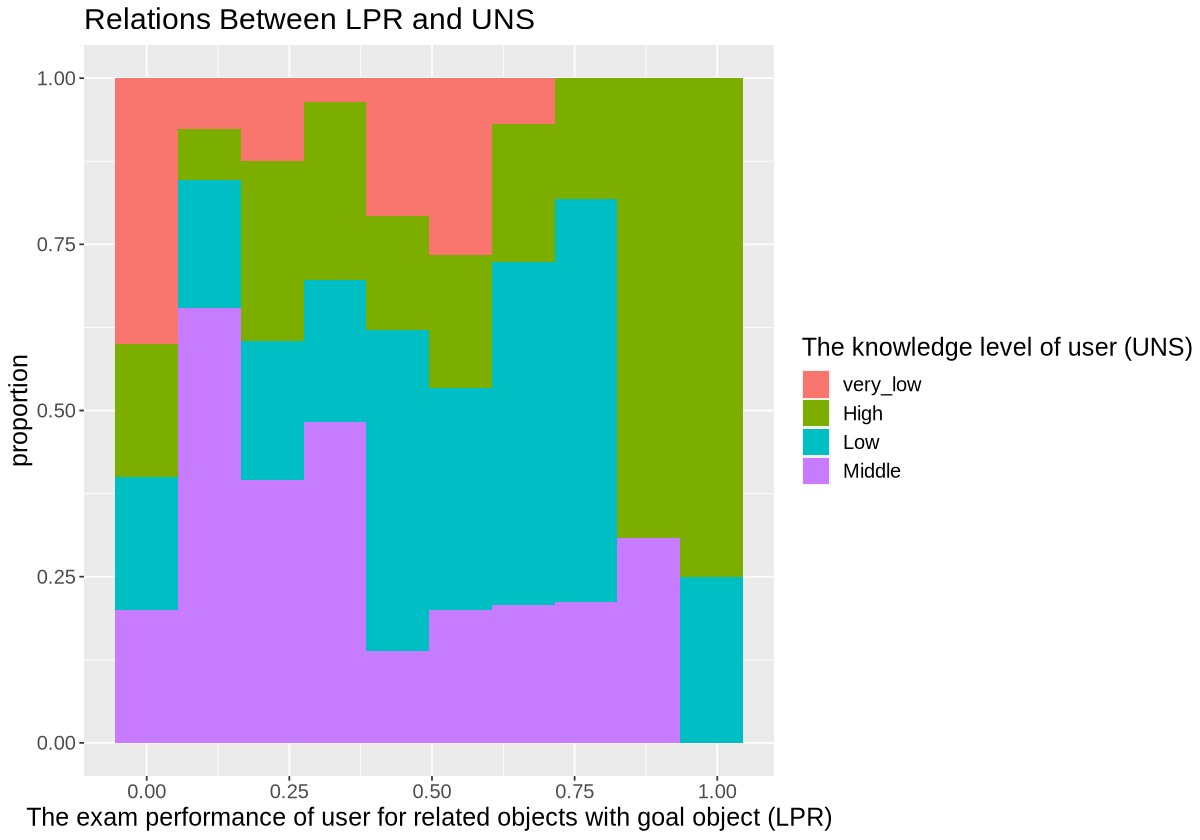

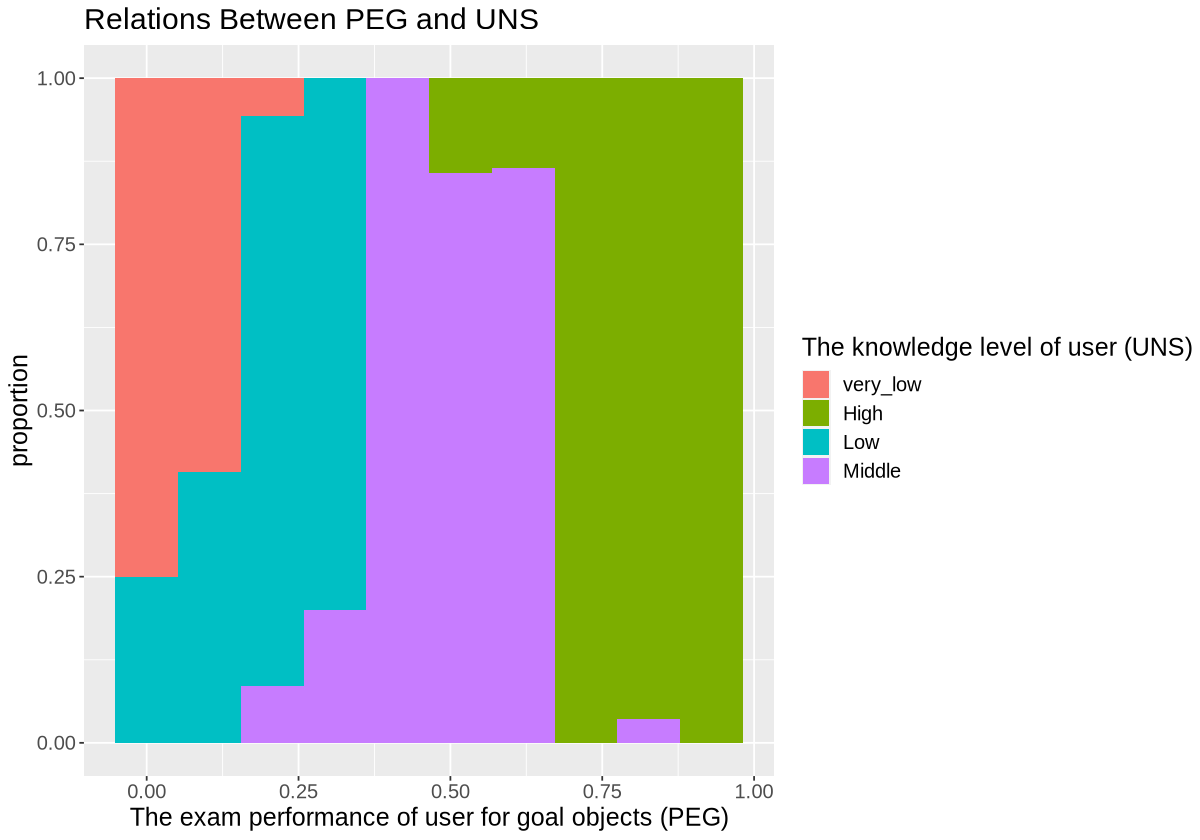

In [11]:
# Use histograms to find the relations between STG, SCG, STR, LPR, PEG and UNS respectively.
plot_STG_UNS<-data_train|>ggplot(aes(x=STG,fill=UNS))+
    geom_histogram(bins=10,position="fill")+
    ggtitle("Relations Between STG and UNS")+
    labs(x="The degree of study time for goal object materials (STG)",
         y="proportion",
        fill="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STG_UNS
plot_SCG_UNS<-data_train|>ggplot(aes(x=SCG,fill=UNS))+
    geom_histogram(bins=10,position="fill")+
    ggtitle("Relations Between SCG and UNS")+
    labs(x="The degree of repetition number of user for goal object materials (SCG)",
         y="proportion",
        fill="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_SCG_UNS

plot_STR_UNS<-data_train|>ggplot(aes(x=STR,fill=UNS))+
    geom_histogram(bins=10,position="fill")+
    ggtitle("Relations Between STR and UNS")+
    labs(x="The degree of study time of user for related objects with goal object (STR)",
         y="proportion",
        fill="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STR_UNS

plot_STG_LPR<-data_train|>ggplot(aes(x=LPR,fill=UNS))+
    geom_histogram(bins=10,position="fill")+
    ggtitle("Relations Between LPR and UNS")+
    labs(x="The exam performance of user for related objects with goal object (LPR)",
         y="proportion",
        fill="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_STG_LPR

plot_PEG_LPR<-data_train|>ggplot(aes(x=PEG,fill=UNS))+
    geom_histogram(bins=10,position="fill")+
    ggtitle("Relations Between PEG and UNS")+
    labs(x="The exam performance of user for goal objects (PEG)",
         y="proportion",
        fill="The knowledge level of user (UNS)")+
    theme(text=element_text(size=15))
plot_PEG_LPR